<h1 align="center">Software Introspection for Signaling Emergent Cyber-Social Operations (SIGNAL)</h1>
<h2 align="center">SRI International</h2>
<h3 align="center">In support of DARPA AIE Hybrid AI to Protect Integrity of Open Source Code (SocialCyber)</h3>

# Question identification and Time Series Construction

## Introduction

In this notebook, we provide

#### References


#### Disclaimer

The content of this notebook is released under the **GNU General Public License v3.0**, see [LICENSE](https://github.com/SRI-CSL/signal-public/blob/main/LICENSE).

In [1]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rc

In [2]:
PARENT_DIR = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(PARENT_DIR)

DATASETS_DIR = os.path.join(PARENT_DIR, 'data')

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.rcParams["figure.figsize"] = (15, 5)

Loading the **activities DataFrame** resulting from the execution of [activity-roles-detection.ipynb](https://github.com/SRI-CSL/signal-public/blob/main/colabs/activity-roles-detection.ipynb)

## Identifying the relevant questions

In order for us to identify relevant questions, we perform frequent itemset mining. To achieve this, we focus on identifying combinations of activities and verify how close those activities are to the **Composite Index**, i.e., how much those activities contribute to the **Composite Index** column in the activities DataFrame.

When considering combinations of two activities, combination 1 corresponding to ('Code Contribution', 'Patch Posting'), is the one providing the most contribution to the composite index. This is an expected behavior in the LKML. However, we are looking also for additional cues that can assist our quest for identifying questions of interest, describing developer actions.

When looking at the combinations of 3 plot, we notice that there are **three** combinations of activities that have significant contributions to the index, namely:

1. Combination 3, ('Code Contribution', 'Patch Posting', 'Progress Control'),
2. Combination 4, ('Code Contribution', 'Patch Posting', 'Acknowledgement and Response'),
3. Combination 5,  ('Code Contribution', 'Progress Control', 'Acknowledgement and Response')

Observing the roles extracted in the [activity-roles-detection.ipynb](https://github.com/SRI-CSL/signal-public/blob/main/colabs/activity-roles-detection.ipynb), we can map the above combination of activities with the **Maintainer**, **Engaged Core Developer**, and **Instigator** role definitions respectively.

Given the roles and the activities considered in the combination triplets, we extract the following 3-questions:

1. Is the next action (taken by a developer) going to be a triage action? **Role 3: Core maintainer**
2. Is the next action (taken by a developer) going to be a small change/bug fix? **Role 2: Engaged core developer**
3. Is the next action (taken by a developer) going to be a controversial change, i.e., spark discussion (a new chain of events)? **Role 4: Instigator**

In [4]:
path_activities_data = os.path.join(DATASETS_DIR, 'role_dataset_V1.csv')
activities_df = pd.read_csv(path_activities_data, sep='\t')
activities_df['sent_time'] = pd.to_datetime(activities_df['sent_time'], utc=True)
activities_df.describe()

,Unnamed: 0,Unnamed: 0.1,sender_id,Code Contribution,Knowledge Sharing,Patch Posting,Progress Control,Acknowledgement and Response,Composite Index,Rank,comb_2,comb_3,is_triage,is_bug_fix,is_controversial
count,27411.000000,27411.000000,27411.000000,27411.000000,27411.000000,27411.000000,27411.000000,27411.000000,27411.000000,27411.000000,27411.000000,27411.000000,27411.000000,27411.000000,27411.000000
mean,13705.000000,13705.000000,466.761410,0.249106,0.002233,0.106345,0.032836,0.031109,0.421628,13706.000000,1.308270,3.640911,0.492430,0.375835,0.119332
std,7913.018451,7913.018451,535.754602,0.069497,0.006065,0.054297,0.021204,0.015424,0.095375,7913.018451,0.981164,0.856430,0.499952,0.484346,0.324184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.042519,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6852.500000,6852.500000,39.000000,0.260254,0.000728,0.062329,0.024287,0.022645,0.375485,6853.500000,1.000000,3.000000,0.000000,0.000000,0.000000
50%,13705.000000,13705.000000,254.000000,0.269938,0.001165,0.126230,0.029335,0.025764,0.449596,13706.000000,1.000000,4.000000,0.000000,0.000000,0.000000
75%,20557.500000,20557.500000,737.000000,0.278295,0.002111,0.153634,0.034573,0.029421,0.486896,20558.500000,1.000000,4.000000,1.000000,1.000000,0.000000
max,27410.000000,27410.000000,2223.000000,0.317105,0.263279,0.176351,0.158647,0.084617,0.695572,27411.000000,9.000000,9.000000,1.000000,1.000000,1.000000


In [5]:
activities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27411 entries, 0 to 27410
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   Unnamed: 0                    27411 non-null  int64              
 1   Unnamed: 0.1                  27411 non-null  int64              
 2   sender_id                     27411 non-null  int64              
 3   sent_time                     27411 non-null  datetime64[ns, UTC]
 4   Code Contribution             27411 non-null  float64            
 5   Knowledge Sharing             27411 non-null  float64            
 6   Patch Posting                 27411 non-null  float64            
 7   Progress Control              27411 non-null  float64            
 8   Acknowledgement and Response  27411 non-null  float64            
 9   Composite Index               27411 non-null  float64            
 10  Rank                          2741

### Time Series Construction

We start by sorting the values by the **sent_time** column of the dataframe. To achieve this, we rely on the [sort_values](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html) method from pandas. If applied as is, this method will sort the records in a DataFrame along the 0-axis (rows) in ascending order.

In [6]:
activities_df = activities_df.sort_values(by=['sent_time'])

In [7]:
activities_df.head()

,Unnamed: 0,Unnamed: 0.1,sender_id,sent_time,Code Contribution,Knowledge Sharing,Patch Posting,Progress Control,Acknowledgement and Response,Composite Index,Rank,Status,comb_2,comb_3,is_triage,is_bug_fix,is_controversial
24091,24091,24091,0,2020-08-20 09:35:52+00:00,0.262744,0.002416,0.000969,0.032951,0.022704,0.321784,24092.0,Below,2,5,0,0,1
24807,24807,24807,0,2020-08-20 09:35:55+00:00,0.243353,0.001691,0.000833,0.028051,0.021198,0.295126,24808.0,Below,2,5,0,0,1
22403,22403,22403,0,2020-08-20 09:36:02+00:00,0.283699,0.000956,0.000653,0.036240,0.022395,0.343942,22404.0,Below,2,5,0,0,1
24838,24838,24838,0,2020-08-20 09:36:06+00:00,0.249099,0.000994,0.000669,0.014546,0.022657,0.287965,24839.0,Below,3,5,0,0,1
23953,23953,23953,0,2020-08-20 09:36:09+00:00,0.282001,0.001464,0.000143,0.016604,0.023747,0.323959,23954.0,Below,3,5,0,0,1


<AxesSubplot:title={'center':'Developer Activities Each Day'}, xlabel='Days', ylabel='Number of activities'>

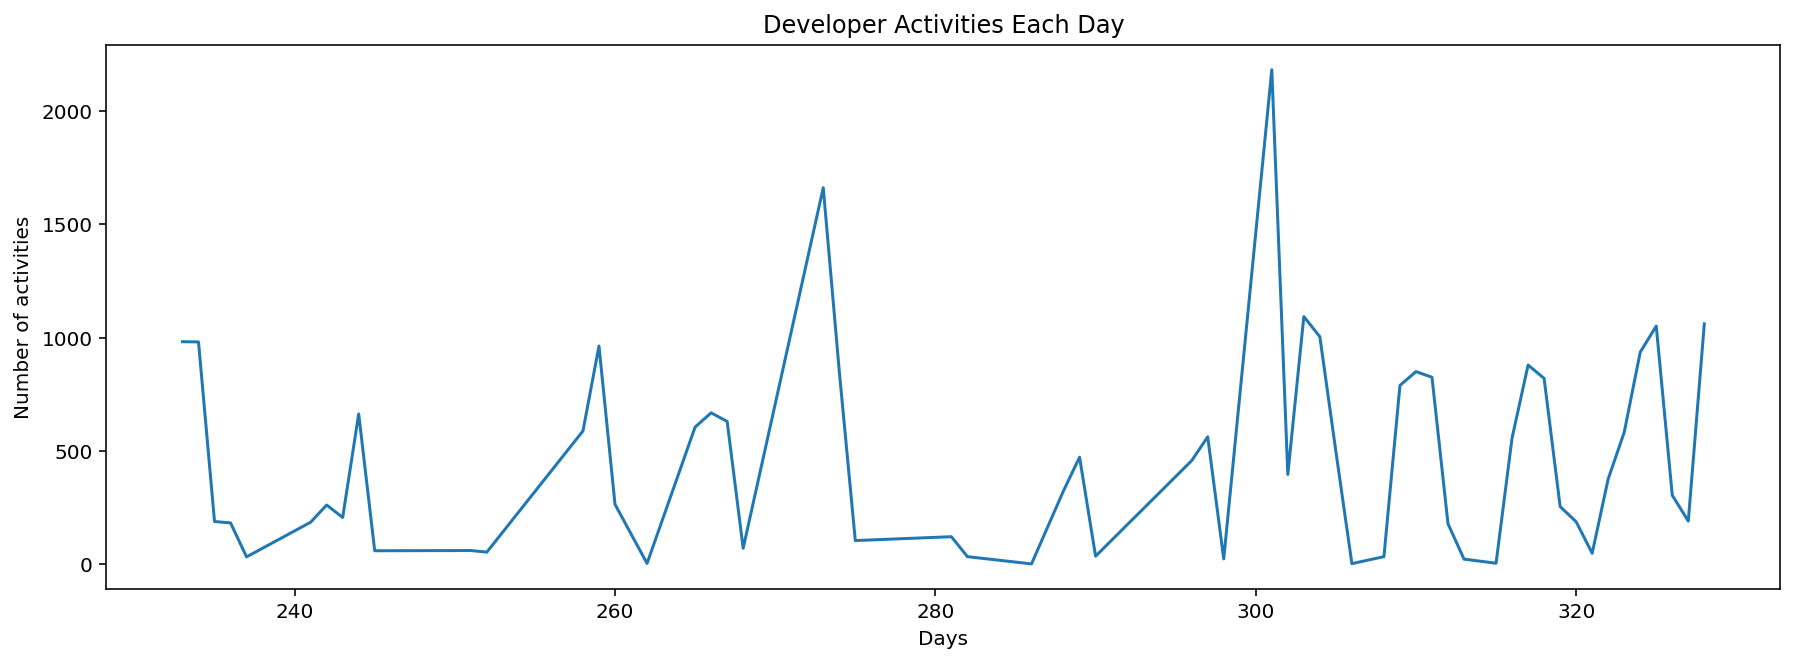

In [8]:
tmp_day = activities_df.groupby(activities_df.sent_time.dt.day_of_year).size()
tmp_day.plot(title="Developer Activities Each Day", xlabel="Days", ylabel="Number of activities")

In the above plot, we can observe that the activities taken by developers can change a lot. While we haven't filtered for specific activity, the fluctuations are still observable.

However, when constructing a time series, the records in it are recommended to be placed in equidistant time slots. To achieve this, we make use of **Grouper** functionality from pandas library. You can read more about it [HERE](https://pandas.pydata.org/docs/reference/api/pandas.Grouper.html).

In [9]:
activities_df = activities_df.set_index(['sent_time'])
activities_df

,Unnamed: 0,Unnamed: 0.1,sender_id,Code Contribution,Knowledge Sharing,Patch Posting,Progress Control,Acknowledgement and Response,Composite Index,Rank,Status,comb_2,comb_3,is_triage,is_bug_fix,is_controversial
sent_time,,,,,,,,,,,,,,,,
2020-08-20 09:35:52+00:00,24091,24091,0,0.262744,0.002416,0.000969,0.032951,0.022704,0.321784,24092.0,Below,2,5,0,0,1
2020-08-20 09:35:55+00:00,24807,24807,0,0.243353,0.001691,0.000833,0.028051,0.021198,0.295126,24808.0,Below,2,5,0,0,1
2020-08-20 09:36:02+00:00,22403,22403,0,0.283699,0.000956,0.000653,0.036240,0.022395,0.343942,22404.0,Below,2,5,0,0,1
2020-08-20 09:36:06+00:00,24838,24838,0,0.249099,0.000994,0.000669,0.014546,0.022657,0.287965,24839.0,Below,3,5,0,0,1
2020-08-20 09:36:09+00:00,23953,23953,0,0.282001,0.001464,0.000143,0.016604,0.023747,0.323959,23954.0,Below,3,5,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-23 14:13:24+00:00,3364,3364,866,0.270693,0.000152,0.175943,0.035049,0.022299,0.504136,3365.0,Above,1,3,1,0,0
2020-11-23 14:14:25+00:00,1757,1757,188,0.282128,0.000176,0.176141,0.040832,0.021727,0.521004,1758.0,Above,1,3,1,0,0
2020-11-23 14:14:44+00:00,4219,4219,1043,0.263039,0.001487,0.175641,0.036315,0.022789,0.499271,4220.0,Above,1,3,1,0,0


In [10]:
# group activities using a frequency of 5 minutes
activities_index_by_5mins = activities_df.groupby(pd.Grouper(freq='5Min', offset='10min', label='right')).first()

In [11]:
activities_index_by_5mins = activities_index_by_5mins.dropna()

In [12]:
activities_index_by_5mins['is_triage'] = activities_index_by_5mins['is_triage'].astype(int)
activities_index_by_5mins['is_bug_fix'] = activities_index_by_5mins['is_bug_fix'].astype(int)
activities_index_by_5mins['is_controversial'] = activities_index_by_5mins['is_controversial'].astype(int)

In [13]:
activities_index_by_5mins.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6404 entries, 2020-08-20 09:40:00+00:00 to 2020-11-23 14:20:00+00:00
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    6404 non-null   float64
 1   Unnamed: 0.1                  6404 non-null   float64
 2   sender_id                     6404 non-null   float64
 3   Code Contribution             6404 non-null   float64
 4   Knowledge Sharing             6404 non-null   float64
 5   Patch Posting                 6404 non-null   float64
 6   Progress Control              6404 non-null   float64
 7   Acknowledgement and Response  6404 non-null   float64
 8   Composite Index               6404 non-null   float64
 9   Rank                          6404 non-null   float64
 10  Status                        6404 non-null   object 
 11  comb_2                        6404 non-null   float64
 12  comb_3        

In [14]:
activities_index_by_5mins.head()

,Unnamed: 0,Unnamed: 0.1,sender_id,Code Contribution,Knowledge Sharing,Patch Posting,Progress Control,Acknowledgement and Response,Composite Index,Rank,Status,comb_2,comb_3,is_triage,is_bug_fix,is_controversial
sent_time,,,,,,,,,,,,,,,,
2020-08-20 09:40:00+00:00,24091.0,24091.0,0.0,0.262744,0.002416,0.000969,0.032951,0.022704,0.321784,24092.0,Below,2.0,5.0,0,0,1
2020-08-20 09:45:00+00:00,23108.0,23108.0,0.0,0.280850,0.001568,0.000576,0.028364,0.023851,0.335209,23109.0,Below,2.0,5.0,0,0,1
2020-08-20 09:50:00+00:00,23765.0,23765.0,0.0,0.275719,0.001016,0.000607,0.025278,0.024017,0.326637,23766.0,Below,2.0,5.0,0,0,1
2020-08-20 09:55:00+00:00,24802.0,24802.0,0.0,0.255530,0.001196,0.000454,0.014711,0.024095,0.295985,24803.0,Below,3.0,5.0,0,0,1
2020-08-20 10:00:00+00:00,23923.0,23923.0,0.0,0.265771,0.000900,0.000690,0.033515,0.023592,0.324468,23924.0,Below,2.0,5.0,0,0,1


<AxesSubplot:title={'center':'Developer Activities Each Day (5 mins window)'}, xlabel='Days', ylabel='Number of activities'>

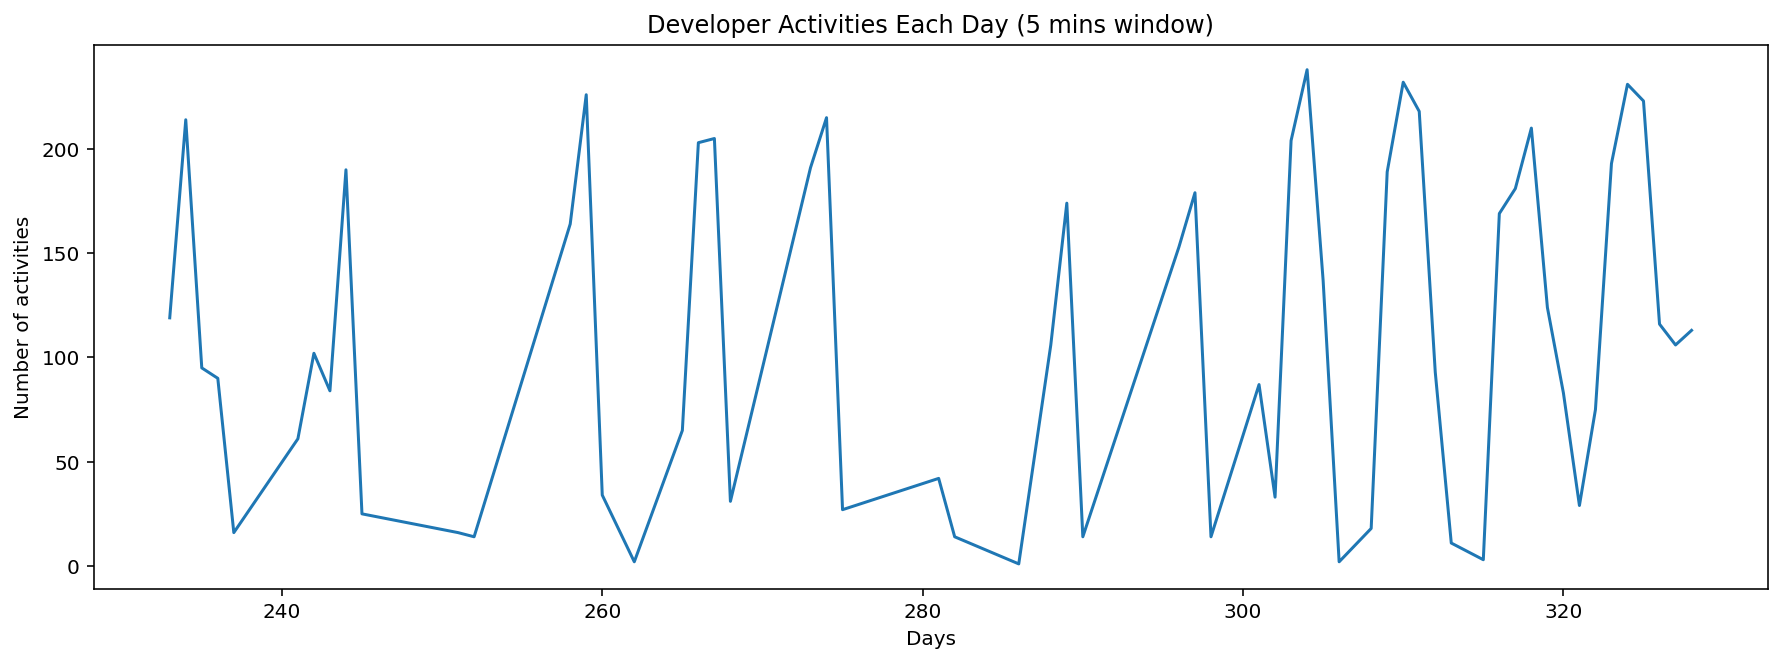

In [17]:
tmp_day = activities_index_by_5mins.groupby(activities_index_by_5mins.index.day_of_year).size()
tmp_day.plot(title="Developer Activities Each Day (5 mins window)", xlabel="Days", ylabel="Number of activities")

In [18]:
# Save the DataFrame to FILE
path_activities_data_5min = os.path.join(DATASETS_DIR, 'activities_5min_window.csv')
activities_index_by_5mins.to_csv(path_activities_data_5min, sep='\t')

In [19]:
# group activities using a frequency of 1 minutes
activities_index_by_1min = activities_df.groupby(pd.Grouper(freq='1Min', offset='10min', label='right')).first()

In [20]:
activities_index_by_1min = activities_index_by_1min.dropna()

In [21]:
activities_index_by_1min['is_triage'] = activities_index_by_1min['is_triage'].astype(int)
activities_index_by_1min['is_bug_fix'] = activities_index_by_1min['is_bug_fix'].astype(int)
activities_index_by_1min['is_controversial'] = activities_index_by_1min['is_controversial'].astype(int)

In [22]:
activities_index_by_1min.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11992 entries, 2020-08-20 09:36:00+00:00 to 2020-11-23 14:17:00+00:00
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    11992 non-null  float64
 1   Unnamed: 0.1                  11992 non-null  float64
 2   sender_id                     11992 non-null  float64
 3   Code Contribution             11992 non-null  float64
 4   Knowledge Sharing             11992 non-null  float64
 5   Patch Posting                 11992 non-null  float64
 6   Progress Control              11992 non-null  float64
 7   Acknowledgement and Response  11992 non-null  float64
 8   Composite Index               11992 non-null  float64
 9   Rank                          11992 non-null  float64
 10  Status                        11992 non-null  object 
 11  comb_2                        11992 non-null  float64
 12  comb_3       

In [23]:
activities_index_by_1min.head()

,Unnamed: 0,Unnamed: 0.1,sender_id,Code Contribution,Knowledge Sharing,Patch Posting,Progress Control,Acknowledgement and Response,Composite Index,Rank,Status,comb_2,comb_3,is_triage,is_bug_fix,is_controversial
sent_time,,,,,,,,,,,,,,,,
2020-08-20 09:36:00+00:00,24091.0,24091.0,0.0,0.262744,0.002416,0.000969,0.032951,0.022704,0.321784,24092.0,Below,2.0,5.0,0,0,1
2020-08-20 09:37:00+00:00,22403.0,22403.0,0.0,0.283699,0.000956,0.000653,0.036240,0.022395,0.343942,22404.0,Below,2.0,5.0,0,0,1
2020-08-20 09:38:00+00:00,24070.0,24070.0,0.0,0.283351,0.000886,0.000755,0.014610,0.022464,0.322066,24071.0,Below,3.0,5.0,0,0,1
2020-08-20 09:39:00+00:00,23999.0,23999.0,0.0,0.267599,0.003482,0.000542,0.028966,0.022600,0.323189,24000.0,Below,2.0,5.0,0,0,1
2020-08-20 09:40:00+00:00,24069.0,24069.0,0.0,0.265409,0.001751,0.000586,0.031036,0.023288,0.322071,24070.0,Below,2.0,5.0,0,0,1


<AxesSubplot:title={'center':'Developer Activities Each Day (1 min window)'}, xlabel='Days', ylabel='Number of activities'>

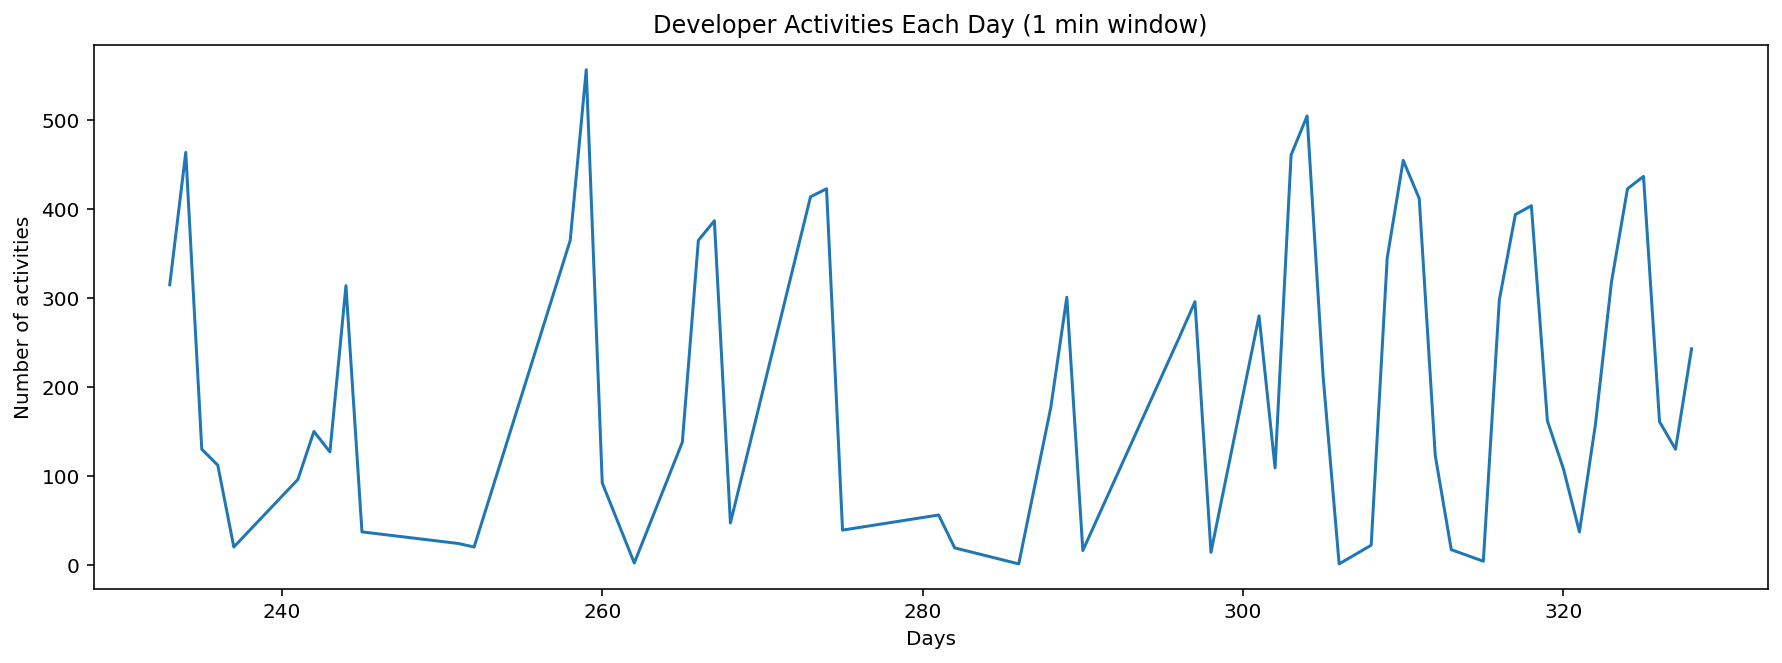

In [24]:
tmp_day = activities_index_by_1min.groupby(activities_index_by_1min.index.day_of_year).size()
tmp_day.plot(title="Developer Activities Each Day (1 min window)", xlabel="Days", ylabel="Number of activities")

In [25]:
# Save the DataFrame to FILE
path_activities_data_1min = os.path.join(DATASETS_DIR, 'activities_1min_window.csv')
activities_index_by_1min.to_csv(path_activities_data_1min, sep='\t')